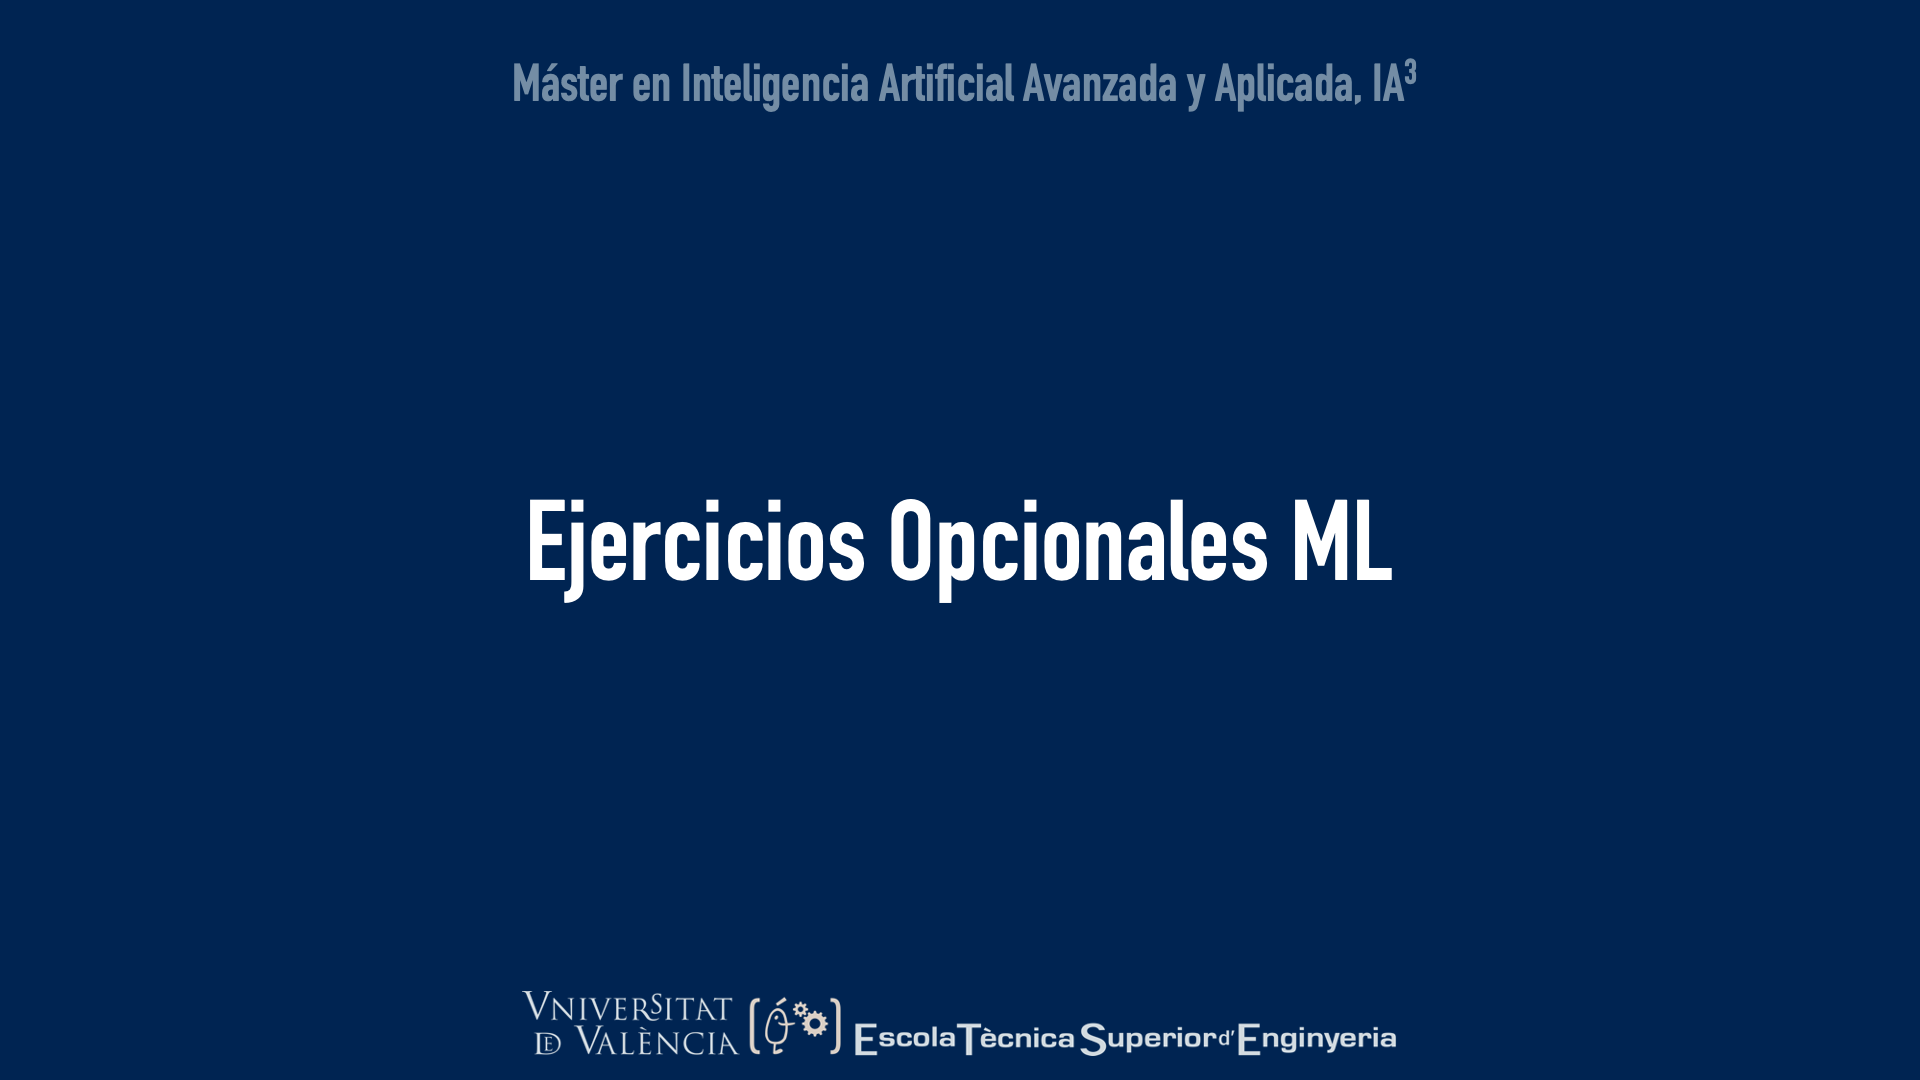

#TEAM: Data Killers!!! 

##Members:
###Andrés Espinosa Sanfiel
###Quique García Vidal
###Héctor Escribano Campos

Hello again guys from IDAL IA3 Master Program. To continue with our experience in ML I am here to propose you two different exercises in order to keep progressing. As before, these two exercises are optional and will only increase your score on this mmodule, feel free to do one, both or none of them. The submission should follow the same rules as in the Batmobile exercise. Send me a link to your collaboratory notebook and keep the same groups as before.

# Exercise 01 - 1 Point:

For this exercise I propose you to draw a flow diagram on how to learn on how to use an algorithm, train and evaluate it.

As we learnt in the class this process should contain a block on understanding how this algorithm learn, a block on how to train it including hyperparameters and one block on how you will evaluate and iterate to tune the hyperparameters.

The idea behind this exercise is that visualizing these ideas it will help you create your own framework to work in ML.

Just draw the diagram using diagram.io and upload it to the notebook.

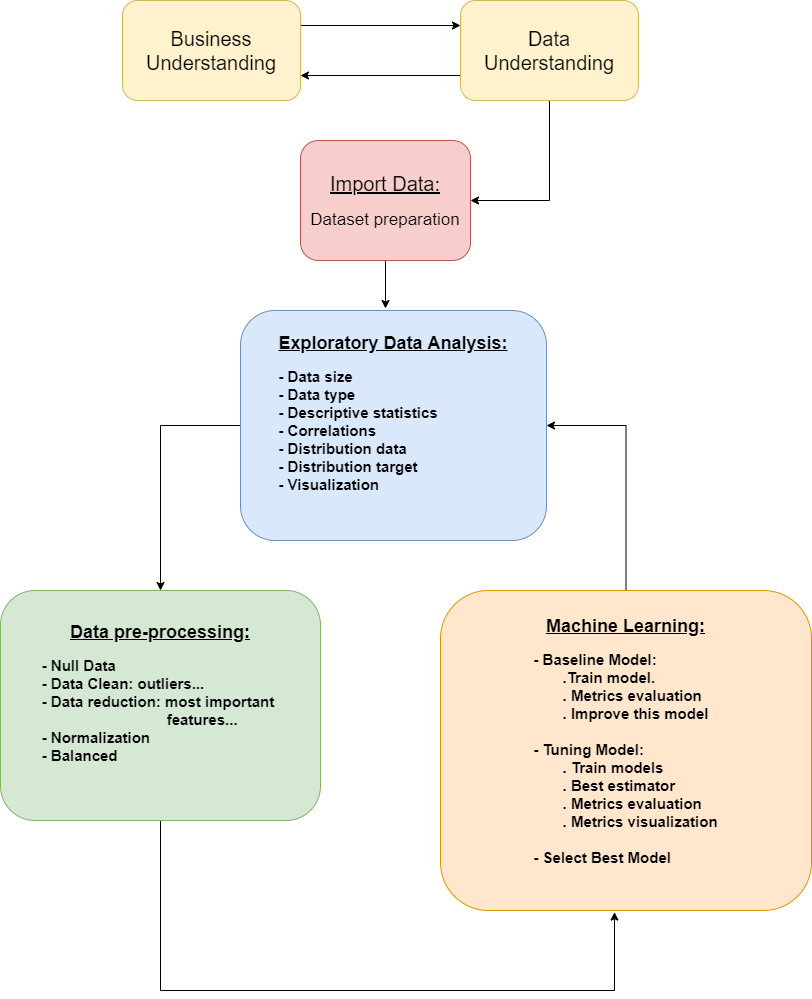

# Exercise 02 - 2 Points:

Now that you have your own framework to work using ML, I propose you to solve the same classification exercise of the pinguins dataset using one of the follow algorithms:

- Logistic Regressions - https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148#:~:text=Logistic%20Regression%20is%20a%20Machine,on%20the%20concept%20of%20probability.&text=The%20hypothesis%20of%20logistic%20regression,function%20between%200%20and%201%20.
- Naive Bayes - https://towardsdatascience.com/naive-bayes-classifier-explained-50f9723571ed#:~:text=Naive%20Bayes%20is%20a%20supervised,prediction%20on%20a%20target%20variable.
- Support Vector Machines (This one is specially difficult to understand and use) - https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989#:~:text=SVM%20or%20Support%20Vector%20Machine,separates%20the%20data%20into%20classes.

Please choose one of the previous algorithms, do the classification exercise and include a small summary of how the algorithm performs against the decission tree and which hyperparameters you should to tune and why.

## Import Libraries

In [ ]:
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, recall_score,precision_score, roc_curve, roc_auc_score
import matplotlib.pylab as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

## Import Dataset

In [ ]:
dataset = sns.load_dataset("penguins")
dataset.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
dataset.shape

(344, 7)

#### STATISTICAL OVERVIEW ANALYSIS

In [ ]:
dataset.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


#### MISSING VALUES ANALYSIS

In [ ]:
dataset.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [52]:
dataset = dataset.dropna(subset = ["sex"], axis = 0)

In [53]:
dataset.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

#### TARGET VARIABLE DISTRIBUTION (CLASS BALANCE ANALYSIS)

In [54]:
sns.set_theme(style="darkgrid")

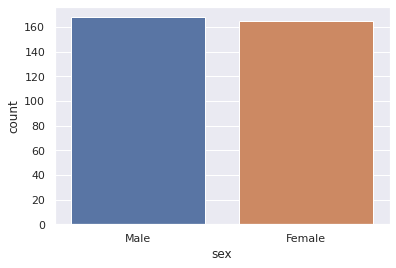

In [55]:
sns.countplot(x = "sex", data = dataset)

#### Target is balanced

### Data distribution for numeric variables

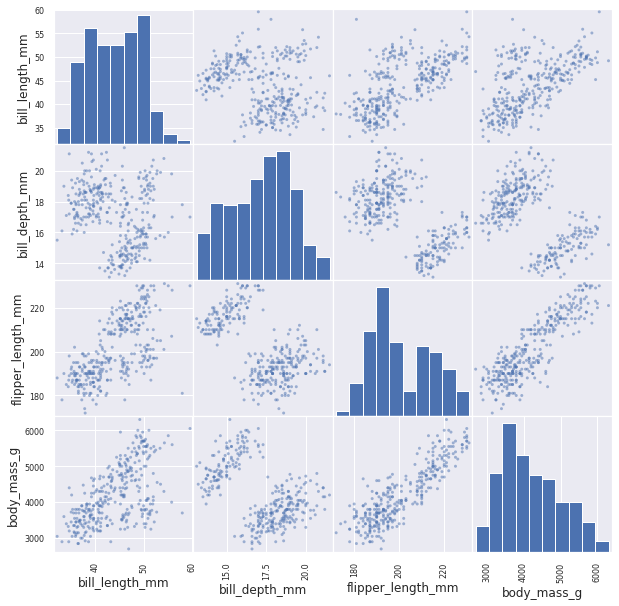

In [56]:
pd.plotting.scatter_matrix(dataset, figsize=(10.0,10.0));

### Scatter plot for numeric variables (splitted by target)

In [57]:
X = dataset.iloc[:,2:]

In [58]:
fig = px.scatter_matrix(data_frame=dataset, dimensions=X.iloc[:,:4], color="sex")
fig.show()

####NUMERIC VARIABLES EXPLORATORY ANALYSIS (OUTLIERS)


In [59]:
numericVariables = list(dataset.dtypes[dataset.dtypes != object].index)
print(numericVariables)

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']


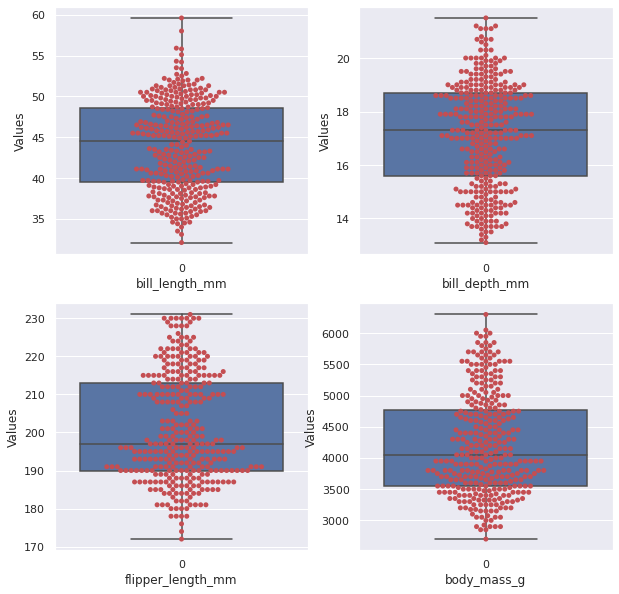

In [60]:
f, axes = plt.subplots(2, 2,figsize=(10, 10))

sns.boxplot(data=dataset['bill_length_mm'] ,ax=axes[0,0])
sns.swarmplot(data=dataset['bill_length_mm'],color='r', ax=axes[0,0])
axes[0,0].set(xlabel='bill_length_mm', ylabel='Values')

sns.boxplot(data=dataset['bill_depth_mm'], ax=axes[0,1])
sns.swarmplot(data=dataset['bill_depth_mm'],color='r', ax=axes[0,1])
axes[0,1].set(xlabel='bill_depth_mm', ylabel='Values')


sns.boxplot(data=dataset['flipper_length_mm'], ax=axes[1,0])
sns.swarmplot(data=dataset['flipper_length_mm'],color='r', ax=axes[1,0])
axes[1,0].set(xlabel='flipper_length_mm', ylabel='Values')

sns.boxplot(data=dataset['body_mass_g'], ax=axes[1,1])
sns.swarmplot(data=dataset['body_mass_g'],color='r', ax=axes[1,1])
axes[1,1].set(xlabel='body_mass_g', ylabel='Values')
plt.show()

### Correlation Matrix

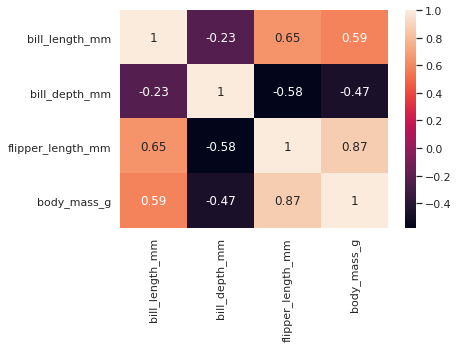

In [61]:
corrMatrix = dataset.corr()
sns.heatmap(corrMatrix, annot=True)

#### CATEGORICAL VARIABLES ANALYSIS

In [62]:
categoricalVariables = list(dataset.dtypes[dataset.dtypes == object].index)
print(categoricalVariables)

['species', 'island', 'sex']


### - Unique levels for island categorical variable:

In [63]:
dataset['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

### - Unique levels for species categorical variable:

In [64]:
dataset['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

#### ONE HOT ENCODING TRANSFORMATION

In [65]:
one_hot_dataset = pd.get_dummies(dataset)

In [66]:
one_hot_dataset.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,1,0,0,0,0,1,0,1


In [67]:
one_hot_dataset = one_hot_dataset.drop(columns = ["species_Gentoo","island_Torgersen","sex_Male"],axis = 1).rename(columns = {"sex_Female":"sex"})

In [68]:
one_hot_dataset.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,island_Biscoe,island_Dream,sex
0,39.1,18.7,181.0,3750.0,1,0,0,0,0
1,39.5,17.4,186.0,3800.0,1,0,0,0,1
2,40.3,18.0,195.0,3250.0,1,0,0,0,1
4,36.7,19.3,193.0,3450.0,1,0,0,0,1
5,39.3,20.6,190.0,3650.0,1,0,0,0,0


#### TRAIN TEST SPLIT

In [69]:
X = one_hot_dataset.drop(columns = ["sex"], axis = 1)
y = one_hot_dataset["sex"]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

### Standardizing numerical variables

#### Train standard

In [71]:
numeric_TRAIN = X_train[X_train.columns[X_train.dtypes != 'uint8']]
categorical_TRAIN = X_train[X_train.columns[X_train.dtypes == 'uint8']]
categorical_TRAIN.index = range(0,len(categorical_TRAIN))
scaler = StandardScaler()
scaler.fit(numeric_TRAIN)
X_data_scaled = pd.DataFrame(scaler.transform(numeric_TRAIN), columns = numeric_TRAIN.columns) 
X_train = X_data_scaled.merge(categorical_TRAIN, left_index=True, right_index=True)

In [72]:
X_train.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,island_Biscoe,island_Dream
0,-1.086665,0.829665,-0.807830,-0.654767,1,0,0,1
1,1.146673,-0.344708,1.987927,1.801433,0,0,1,0
2,0.189528,-1.621200,0.729837,0.634738,0,0,1,0
3,0.489809,-1.774379,0.590049,0.389118,0,0,1,0
4,0.227063,-1.263782,0.380367,1.003168,0,0,1,0


#### Test standard

In [73]:
numeric_TEST = X_test[X_test.columns[X_test.dtypes != 'uint8']]
categorical_TEST = X_test[X_test.columns[X_test.dtypes == 'uint8']]
categorical_TEST.index = range(0,len(categorical_TEST))
X_data_scaled = pd.DataFrame(scaler.transform(numeric_TEST), columns = numeric_TEST.columns) 
X_test = X_data_scaled.merge(categorical_TEST, left_index=True, right_index=True)

In [74]:
X_test.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,island_Biscoe,island_Dream
0,0.320901,1.697680,-0.737936,0.450523,1,0,1,0
1,0.414739,0.625427,-1.646557,-1.207412,0,1,0,1
2,-0.073218,-1.416962,1.288988,0.573333,0,0,1,0
3,0.677484,-1.519081,0.729837,0.788250,0,0,1,0
4,1.334349,0.931785,0.100791,-0.163527,0,1,0,1


### LOGISTIC REGRESSION

In [104]:
parameters_lr={'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'max_iter':[12],'penalty':['l1','l2'],'C':[0.01,0.1,1,10]}
model_lr=LogisticRegression()
grid_lr = GridSearchCV(model_lr,parameters_lr, cv=7,scoring='f1_micro')

####Model training

In [105]:
grid_lr.fit(X_train,y_train);

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning:

The max_iter 

#### Best estimator

In [77]:
grid_lr.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=12,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

####Model predict

In [79]:
y_predict_train_lr= grid_lr.best_estimator_.predict(X_train)
y_predict_test_lr= grid_lr.best_estimator_.predict(X_test)

####Model evaluation

In [80]:
accuracy_train_lr=grid_lr.best_estimator_.score(X_train, y_train)
accuracy_test_lr=grid_lr.best_estimator_.score(X_test, y_test)
f1score_lr=f1_score(y_test,y_predict_test_lr,average=None)
recall_lr=recall_score(y_test,y_predict_test_lr,average=None)
precision_lr=precision_score(y_test,y_predict_test_lr,average=None)

print('Accuaracy train: ',accuracy_train_lr)
print('Accuaracy test: ',accuracy_test_lr)
print('F1 score: ',f1score_lr)
print('Recall: ',recall_lr)
print('Precision: ',precision_lr)

Accuaracy train:  0.9141630901287554
Accuaracy test:  0.91
F1 score:  [0.91891892 0.8988764 ]
Recall:  [0.91071429 0.90909091]
Precision:  [0.92727273 0.88888889]


####Train Confusion Matrix

In [81]:
confusion_matrix(y_train, y_predict_train_lr)

array([[101,  11],
       [  9, 112]])

####Test Confusion Matrix

In [82]:
confusion_matrix(y_test, y_predict_test_lr)

array([[51,  5],
       [ 4, 40]])

### SUPPORT VECTOR MACHINE (using GridSearchCV)

In [83]:
model_svc = SVC()
parameters = {'kernel':['linear','poly','rbf','sigmoid']}
grid_svc = GridSearchCV(model_svc,parameters, cv=7)

####Model training

In [84]:
grid_svc.fit(X_train,y_train)

GridSearchCV(cv=7, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

#### Best estimator

In [85]:
grid_svc.best_estimator_

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

####Model predict

In [86]:
y_predict_train_svc= grid_svc.best_estimator_.predict(X_train)
y_predict_test_svc= grid_svc.best_estimator_.predict(X_test)

####Model evaluation

In [87]:
accuracy_train_svc=grid_svc.best_estimator_.score(X_train, y_train)
accuracy_test_svc=grid_svc.best_estimator_.score(X_test, y_test)
f1score_svc=f1_score(y_test,y_predict_test_svc,average=None)
recall_svc=recall_score(y_test,y_predict_test_svc,average=None)
precision_svc=precision_score(y_test,y_predict_test_svc,average=None)

print('Accuaracy train: ',accuracy_train_svc)
print('Accuaracy test: ',accuracy_test_svc)
print('F1 score: ',f1score_svc)
print('Recall: ',recall_svc)
print('Precision: ',precision_svc)

Accuaracy train:  0.9227467811158798
Accuaracy test:  0.91
F1 score:  [0.92035398 0.89655172]
Recall:  [0.92857143 0.88636364]
Precision:  [0.9122807  0.90697674]


####Train Confusion Matrix

In [92]:
confusion_matrix(y_train, y_predict_train_svc)

array([[106,   6],
       [ 12, 109]])

####Test Confusion Matrix

In [93]:
confusion_matrix(y_test, y_predict_test_svc)

array([[52,  4],
       [ 5, 39]])

### RANDOM FOREST (using GridSearchCV)

In [94]:
param_grid = {'n_estimators':[10,50],
              'max_samples': [30,60,90],
              'max_depth':[5,7,9],
              'max_features': [2,3,4],
              'min_samples_split':[4,6,8],
              'criterion': ['entropy','gini'],
              'bootstrap':[True,False]}

model_rf = RandomForestClassifier()
grid_rf= GridSearchCV(model_rf, param_grid)

#### Model training

In [97]:
grid_rf.fit(X_train, y_train);

#### Best estimator

In [98]:
grid_rf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features=2,
                       max_leaf_nodes=None, max_samples=60,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Model predict

In [99]:
y_predict_train_rf= grid_rf.best_estimator_.predict(X_train)
y_predict_test_rf= grid_rf.best_estimator_.predict(X_test)

#### Model evaluation

In [102]:
accuracy_train_rf=grid_rf.best_estimator_.score(X_train, y_train)
accuracy_test_rf=grid_rf.best_estimator_.score(X_test, y_test)
f1score_rf=f1_score(y_test,y_predict_test_rf,average=None)
recall_rf=recall_score(y_test,y_predict_test_rf,average=None)
precision_rf=precision_score(y_test,y_predict_test_rf,average=None)

print('Accuaracy train: ',accuracy_train_rf)
print('Accuaracy test: ',accuracy_test_rf)
print('F1 score: ',f1score_rf)
print('Recall: ',recall_rf)
print('Precision: ',precision_rf)

Accuaracy train:  0.944206008583691
Accuaracy test:  0.92
F1 score:  [0.92982456 0.90697674]
Recall:  [0.94642857 0.88636364]
Precision:  [0.9137931  0.92857143]


####Curve ROC RandomForest

In [100]:
new_probs_test = []
for value in y_test:
  if value == 1:
    new_probs_test.append(1.0)
  else:
    new_probs_test.append(0.0)

new_probs_train = []
for value in y_train:
  if value == 1:
    new_probs_train.append(1.0)
  else:
    new_probs_train.append(0.0)

fpr_train, tpr_train, thresholds_train = roc_curve(new_probs_train, grid_rf.best_estimator_.predict_proba(X_train)[:,1], drop_intermediate=False)
fpr_test, tpr_test, thresholds_test = roc_curve(new_probs_test, grid_rf.best_estimator_.predict_proba(X_test)[:,1], drop_intermediate=False)

df_roc_train = pd.DataFrame({'fpr':fpr_train, 'tpr':tpr_train, 'threshold':thresholds_train})
df_roc_test = pd.DataFrame({'fpr':fpr_test, 'tpr':tpr_test, 'threshold':thresholds_test})

print('AUC train: ',roc_auc_score(new_probs_train, grid_rf.best_estimator_.predict_proba(X_train)[:,1]))
print('AUC test: ',roc_auc_score(new_probs_test, grid_rf.best_estimator_.predict_proba(X_test)[:,1]))

fig = px.line(df_roc_test, x='fpr', y='tpr', hover_data=['threshold'])
fig.show()

AUC train:  0.9863857733175915
AUC test:  0.9659090909090909


## Conclusion

In [103]:
dict_metrics={'Logistic Regression':[accuracy_train_lr,accuracy_test_lr,list(np.around(np.array(f1score_lr),4)),list(np.around(np.array(recall_lr),4)),list(np.around(np.array(precision_rf),4))],
              'Support Vector Machine':[accuracy_train_svc,accuracy_test_svc,list(np.around(np.array(f1score_svc),4)),list(np.around(np.array(recall_svc),4)),list(np.around(np.array(precision_svc),4))],
              'Random Forest':[accuracy_train_rf,accuracy_test_rf,list(np.around(np.array(f1score_rf),4)),list(np.around(np.array(recall_rf),4)),list(np.around(np.array(precision_rf),4))]
              }
df_metrics=pd.DataFrame(dict_metrics,index=['Accuracy Train','Accuracy Test','F1 Score','Recall','Precision'])


In [ ]:
df_metrics

,Logistic Regression,Support Vector Machine,Random Forest
Accuracy Train,0.914163,0.922747,0.93133
Accuracy Test,0.91,0.91,0.9
F1 Score,"[0.9189, 0.8989]","[0.9204, 0.8966]","[0.9091, 0.8889]"
Recall,"[0.9107, 0.9091]","[0.9286, 0.8864]","[0.8929, 0.9091]"
Precision,"[0.9259, 0.8696]","[0.9123, 0.907]","[0.9259, 0.8696]"


### Similar metrics in the 3 models